In [1]:
from src import h5pydict
from src import simpleDASreader
from src import dasly

In [3]:
signal = dasly.load_das(
    '../data/raw/Campus_test_20230628_2kHz/',
    start='20230628 112130',
    # end='20230628 113128',
    duration=60
)
signal.info()

7 files, from 112129 to 112229
<class 'src.simpleDASreader.DASDataFrame'>
DatetimeIndex: 120000 entries, 2023-06-28 11:22:29.999500 to 2023-06-28 11:21:30
Freq: -500000N
Columns: 600 entries, 0 to 599
dtypes: float32(600)
memory usage: 275.6 MB


In [4]:
signal.tail()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
2023-06-28 11:21:30.002000,3.054203e-08,3.697934e-08,1.748696e-08,1.594283e-08,-5.414546e-09,-7.680634e-09,2.426516e-09,5.454654e-09,-1.333583e-08,-8.623151e-09,...,4.277490e-08,5.197962e-08,1.628574e-07,9.942712e-08,-2.013410e-08,1.136654e-07,1.272819e-07,5.234057e-08,6.048252e-08,2.867702e-08
2023-06-28 11:21:30.001500,2.689222e-08,3.184554e-08,1.463931e-08,1.389733e-08,-3.088297e-09,-4.993416e-09,1.664469e-09,4.090991e-09,-1.570219e-08,-9.264875e-09,...,4.187247e-08,5.645163e-08,1.624563e-07,9.463425e-08,-2.119695e-08,1.140665e-07,1.276027e-07,5.175900e-08,6.122452e-08,2.980003e-08
2023-06-28 11:21:30.001000,2.125709e-08,2.663154e-08,1.371683e-08,1.247351e-08,-2.787489e-09,-5.234062e-09,1.183176e-09,3.890452e-09,-1.664472e-08,-1.010714e-08,...,4.341662e-08,5.524840e-08,1.633587e-07,9.788297e-08,-2.003383e-08,1.142068e-07,1.277631e-07,5.009453e-08,5.863756e-08,2.951928e-08
2023-06-28 11:21:30.000500,1.662464e-08,1.959263e-08,1.153096e-08,1.287459e-08,-3.108351e-09,-4.231369e-09,2.627055e-09,3.168513e-09,-1.861000e-08,-1.251360e-08,...,4.235376e-08,5.410532e-08,1.586461e-07,9.682012e-08,-1.670488e-08,1.161521e-07,1.268607e-07,5.001432e-08,6.238763e-08,3.018106e-08
2023-06-28 11:21:30.000000,8.322341e-09,1.514067e-08,1.413796e-08,1.185184e-08,-1.383718e-09,-3.068244e-09,2.065547e-09,1.764742e-09,-2.113679e-08,-1.259382e-08,...,4.279495e-08,5.244086e-08,1.600699e-07,9.836427e-08,-1.822898e-08,1.145477e-07,1.268407e-07,5.185928e-08,6.196650e-08,2.923853e-08


In [5]:
signal_lowcut = dasly.lowcut_filter(signal, 1, 0.5/(1/2000), axis=0)
signal_highcut = dasly.highcut_filter(signal_lowcut, cutoff_freq=200, nyq_freq=0.5/(1/2000))
signal_sample = dasly.decimate(signal_highcut, dt=1/2000, dt_out=1/2000*64, axis=0)
data = signal_sample

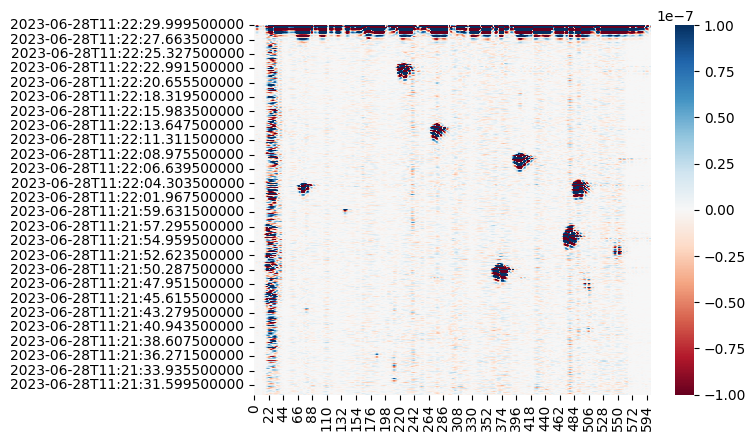

In [6]:
dasly.heatmap(data);

In [7]:
gauss_df = dasly.gauss_filter(data)
gauss_df.head()

,0,1,2,3,4,5,6,7,8,9,...,590,591,592,593,594,595,596,597,598,599
2023-06-28 11:22:29.999500,7.195375e-08,7.332235e-08,7.608864e-08,8.030901e-08,8.606392e-08,9.345385e-08,1.025935e-07,1.136048e-07,1.266081e-07,1.417133e-07,...,3.224843e-07,3.052897e-07,2.893303e-07,2.748131e-07,2.619374e-07,2.508893e-07,2.418351e-07,2.349153e-07,2.302395e-07,2.278825e-07
2023-06-28 11:22:29.967500,7.162413e-08,7.298661e-08,7.574053e-08,7.994199e-08,8.567108e-08,9.302778e-08,1.021263e-07,1.130878e-07,1.260321e-07,1.410687e-07,...,3.210984e-07,3.039849e-07,2.881002e-07,2.736502e-07,2.608336e-07,2.498359e-07,2.408228e-07,2.339343e-07,2.292795e-07,2.269331e-07
2023-06-28 11:22:29.935500,7.097198e-08,7.232235e-08,7.505179e-08,7.921585e-08,8.489385e-08,9.218480e-08,1.012018e-07,1.120649e-07,1.248926e-07,1.397934e-07,...,3.183550e-07,3.014021e-07,2.856649e-07,2.713479e-07,2.586484e-07,2.477504e-07,2.388186e-07,2.319919e-07,2.273788e-07,2.250534e-07
2023-06-28 11:22:29.903500,7.001134e-08,7.134388e-08,7.403726e-08,7.814623e-08,8.374898e-08,9.094310e-08,9.984004e-08,1.105581e-07,1.232142e-07,1.379149e-07,...,3.143099e-07,2.975935e-07,2.820736e-07,2.679525e-07,2.554253e-07,2.446743e-07,2.358622e-07,2.291266e-07,2.245749e-07,2.222804e-07
2023-06-28 11:22:29.871500,6.876250e-08,7.007188e-08,7.271839e-08,7.675575e-08,8.226070e-08,8.932896e-08,9.806988e-08,1.085995e-07,1.210324e-07,1.354732e-07,...,3.090438e-07,2.926348e-07,2.773974e-07,2.635309e-07,2.512278e-07,2.406678e-07,2.320114e-07,2.253942e-07,2.209223e-07,2.186679e-07


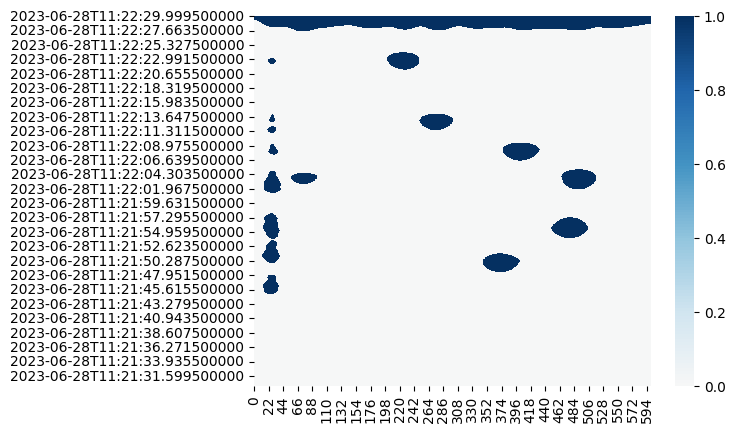

In [8]:
dasly.plot_events(gauss_df);

In [9]:
events = dasly.detect_events(gauss_df)
events

array([[   0,    0],
       [   0,    1],
       [   0,    2],
       ...,
       [1410,   25],
       [1410,   26],
       [1410,   27]])

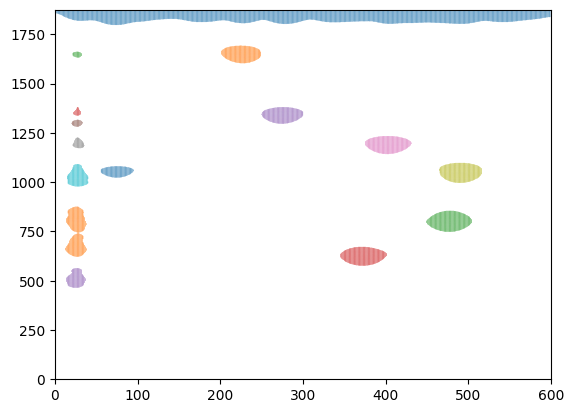

In [10]:
dasly.classify_events(gauss_df);

In [22]:
# dasly.save_das(data, events)

In [25]:
import os
entries = os.listdir('data/')

In [32]:
entries[33]

'112150_373.hdf5'

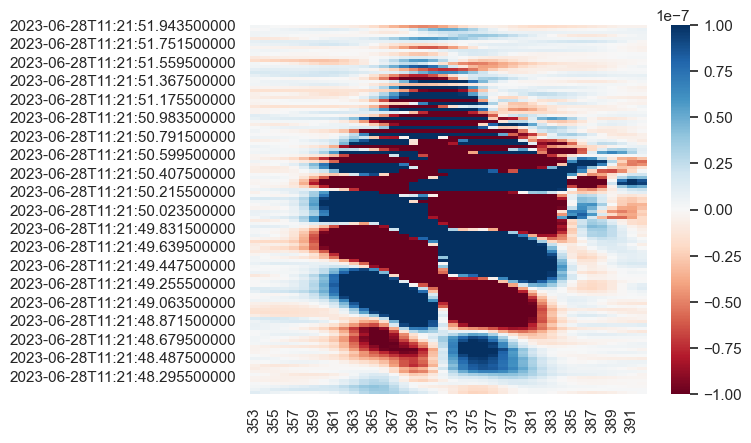

In [31]:
dat = pd.read_hdf(f'data/{entries[33]}')
dasly.heatmap(dat);